In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
import seaborn as sns
import numpy as np
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import data 

save viz

In [2]:
sav = pd.read_pickle('../Dataframes/df_wind_save.pkl') 

In [9]:
sav

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1951-01-01,00:00:00,100.0,G,3.0,G,1951,1,3.29,5.0
1,1951-01-01,03:00:00,110.0,G,2.0,G,1951,1,3.29,5.0
2,1951-01-01,06:00:00,70.0,G,2.0,G,1951,1,3.29,5.0
3,1951-01-01,12:00:00,90.0,G,3.0,G,1951,1,3.29,5.0
4,1951-01-01,15:00:00,70.0,G,4.0,G,1951,1,3.29,5.0
...,...,...,...,...,...,...,...,...,...,...
430417,2006-12-05,09:00:00,190.0,G,8.0,G,2006,12,9.21,11.0
430418,2006-12-05,10:00:00,190.0,Y,8.0,Y,2006,12,9.21,11.0
430419,2006-12-05,11:00:00,200.0,Y,9.0,Y,2006,12,9.21,11.0
430420,2006-12-05,12:00:00,200.0,G,11.0,G,2006,12,9.21,11.0


In [3]:
# sav.rename(columns={'Year': 'year'}, inplace=True)
sav['Datum'] = pd.to_datetime(sav['Datum'])
# sav_year_wind = sav.groupby(sav['Datum'].dt.year)['Vindhastighet'].mean()
yearly_wind_sav = sav.groupby(sav['Datum'].dt.year)['Vindhastighet'].agg(['mean', 'median']).reset_index()

yearly_wind_sav.columns = ['Year', 'Mean Wind Speed', 'Median Wind Speed']

yearly_wind_sav['Year'] = pd.to_datetime(yearly_wind_sav['Year'], format='%Y')
yearly_wind_sav.set_index('Year', inplace=True)



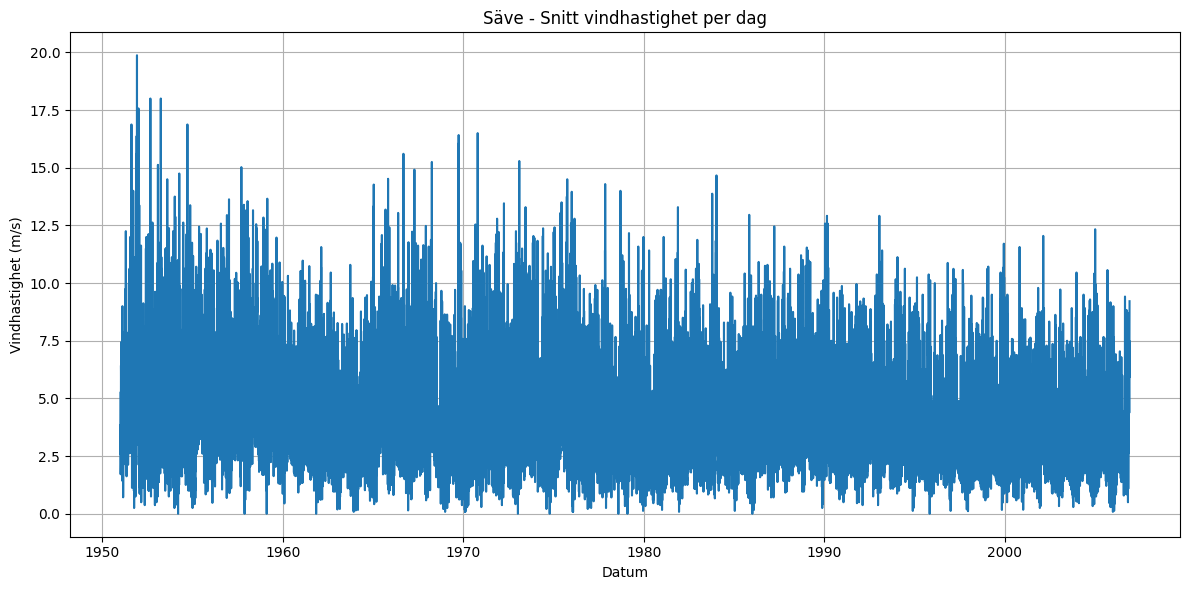

In [4]:
daily_wind_sav = sav.groupby(sav['Datum'])['Vindhastighet'].agg(['mean', 'median']).reset_index()

daily_wind_sav.columns = ['Datum', 'Mean Wind Speed', 'Median Wind Speed']

daily_wind_sav.set_index('Datum', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(daily_wind_sav.index, daily_wind_sav['Mean Wind Speed'])
# plt.plot(daily_wind_sav.index, daily_wind_sav['Median Wind Speed'], label='Daily Median Wind Speed (m/s)')
plt.xlabel('Datum')
plt.ylabel('Vindhastighet (m/s)')
plt.title('Säve - Snitt vindhastighet per dag')
plt.grid(True)


plt.tight_layout()
plt.show()


combined wind data 


In [5]:
# df.rename(columns={'Year': 'year'}, inplace=True)
sav['Datum'] = pd.to_datetime(sav['Datum'])
# df_year_wind = df.groupby(df['Datum'].dt.year)['Vindhastighet'].mean()
yearly_wind = sav.groupby(sav['Datum'].dt.year)['Vindhastighet'].agg(['mean', 'median']).reset_index()

yearly_wind.columns = ['Year', 'Mean Wind Speed', 'Median Wind Speed']



yearly_wind['Year'] = pd.to_datetime(yearly_wind['Year'], format='%Y')
yearly_wind.set_index('Year', inplace=True)


In [6]:
df_2 = pd.read_excel('../data/SCB_årlig_nybyggda lagenheter_göteborg_1975_2023.xlsx')

In [7]:
df_2.rename(columns={'Year': 'year'}, inplace=True)
df_2['year'] = pd.to_datetime(df_2['year'], format='%Y')
df_2.set_index('year', inplace=True)
df_2['total_housing'] = df_2['flerbostadshus'] + df_2['småhus']

In [8]:
df_2

,flerbostadshus,småhus,total_housing
year,,,
1975-01-01,2250,1479,3729
1976-01-01,996,1158,2154
1977-01-01,1307,782,2089
1978-01-01,925,961,1886
1979-01-01,584,1178,1762
1980-01-01,1213,990,2203
1981-01-01,638,762,1400
1982-01-01,1052,785,1837
1983-01-01,571,597,1168


In [10]:
# Create a new DataFrame with the desired index
new_index = pd.date_range(start='1975-01-01', end='2006-12-05', freq='AS')
new_df = pd.DataFrame(index=new_index)

# Extract the 'Mean Wind Data' and 'total housing' columns
mean_wind_data = yearly_wind_sav['Mean Wind Speed']
new_housing = df_2['total_housing']

new_df['Mean Wind Data'] = mean_wind_data
new_df['New Housing'] = new_housing

# Create the 'Total Housing' column
new_df['Total Housing'] = new_df['New Housing'].cumsum()


# Fill the first row of 'Total Housing' with the value from the 'New Housing' column
# new_df['Total Housing'].iloc[0] = new_df['New Housing'].iloc[0]

# Convert the 'Total Housing' column to integers (optional)
new_df['Total Housing'] = new_df['Total Housing'].astype(int)



In [11]:
new_df

,Mean Wind Data,New Housing,Total Housing
1975-01-01,5.329069,3729,3729
1976-01-01,3.793410,2154,5883
1977-01-01,3.970880,2089,7972
1978-01-01,4.154586,1886,9858
1979-01-01,4.016907,1762,11620
1980-01-01,3.324371,2203,13823
1981-01-01,4.215411,1400,15223
1982-01-01,4.581316,1837,17060
1983-01-01,4.401279,1168,18228
1984-01-01,3.891913,1406,19634


# Summary statistics

In [12]:
summary_wind = yearly_wind_sav['Mean Wind Speed'].describe()

# Calculate summary statistics for 'Total_Nederbördsmängd' in df2
summary_bygg_data = df_2['total_housing'].describe()

# Combine the summary statistics into a single DataFrame
summary_table = pd.concat([summary_wind, summary_bygg_data], axis=1)
summary_table.columns = ['Mean Wind Data', 'Addtional apartments built this year']

print(summary_table)

       Mean Wind Data  Addtional apartments built this year
count       56.000000                             48.000000
mean         4.364143                           1842.625000
std          0.584117                           1100.511808
min          3.324371                            435.000000
25%          3.897820                           1177.750000
50%          4.278878                           1561.000000
75%          4.784252                           2105.250000
max          5.688818                           5621.000000


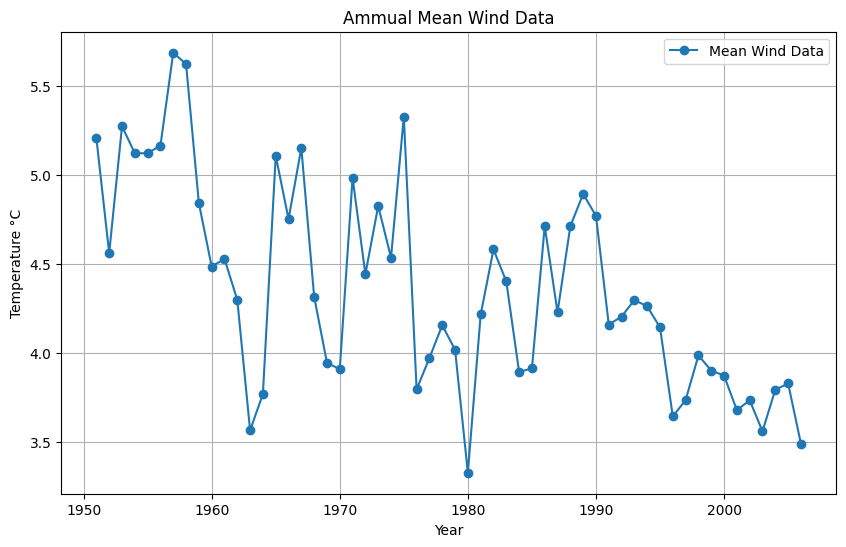

In [13]:
# scatterplot with wind data & total yearly new apartments 
plt.figure(figsize=(10, 6))
plt.plot(yearly_wind_sav.index, yearly_wind_sav['Mean Wind Speed'], label='Mean Wind Data', marker='o')
plt.title('Ammual Mean Wind Data')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.grid(True)
plt.legend()
plt.show()

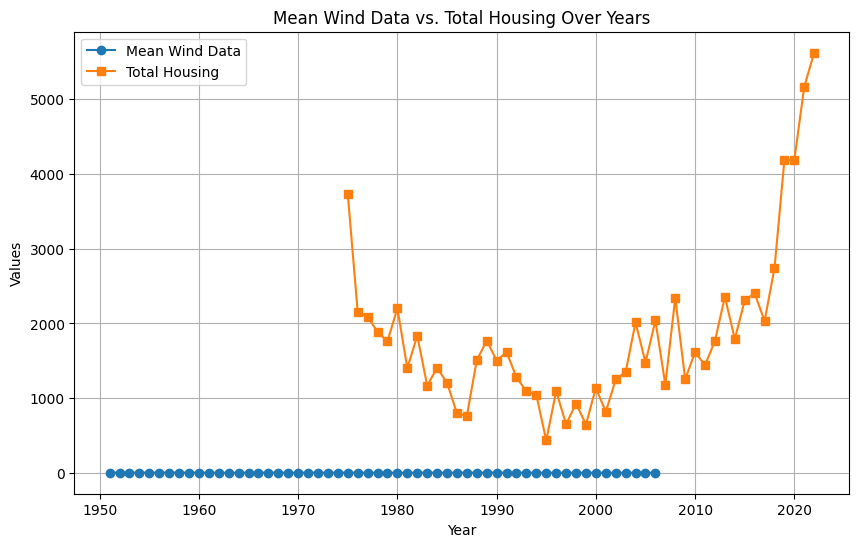

In [14]:
# scatterplot with wind data & total yearly new apartments 
plt.figure(figsize=(10, 6))
plt.plot(yearly_wind_sav.index, yearly_wind_sav['Mean Wind Speed'], label='Mean Wind Data', marker='o')
plt.plot(df_2.index, df_2['total_housing'], label='Total Housing', marker='s')
plt.title('Mean Wind Data vs. Total Housing Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()


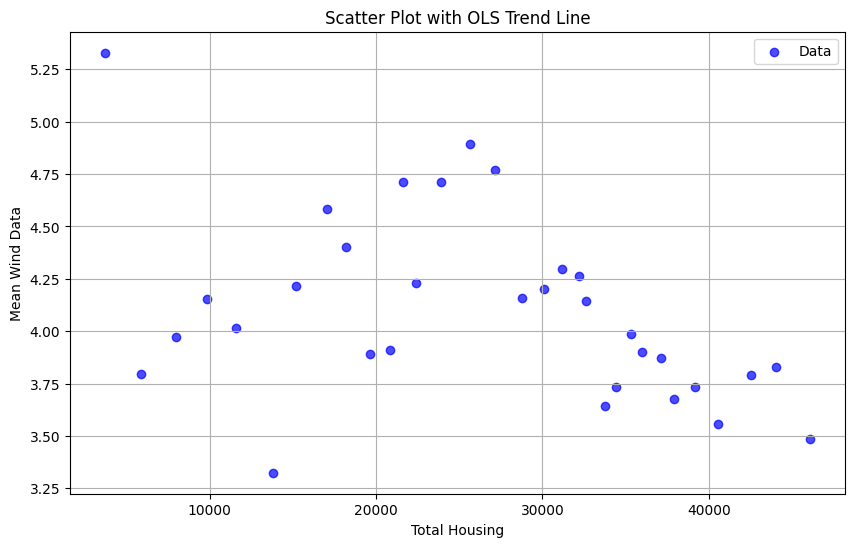

In [15]:
# LOOK AT A SCATTERPLOT WITH ANNUAL HOUSING PRODUCTION AND AVERAGE YEARLY WIND SPEAD 
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
# plt.plot(new_df['Total Housing'], color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

In [16]:

X = sm.add_constant(new_df['Total Housing'])

# Perform the linear regression
model = sm.OLS(new_df['Mean Wind Data'], X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Mean Wind Data   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.330
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0175
Time:                        09:59:52   Log-Likelihood:                -16.025
No. Observations:                  32   AIC:                             36.05
Df Residuals:                      30   BIC:                             38.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5177      0.182     24.873

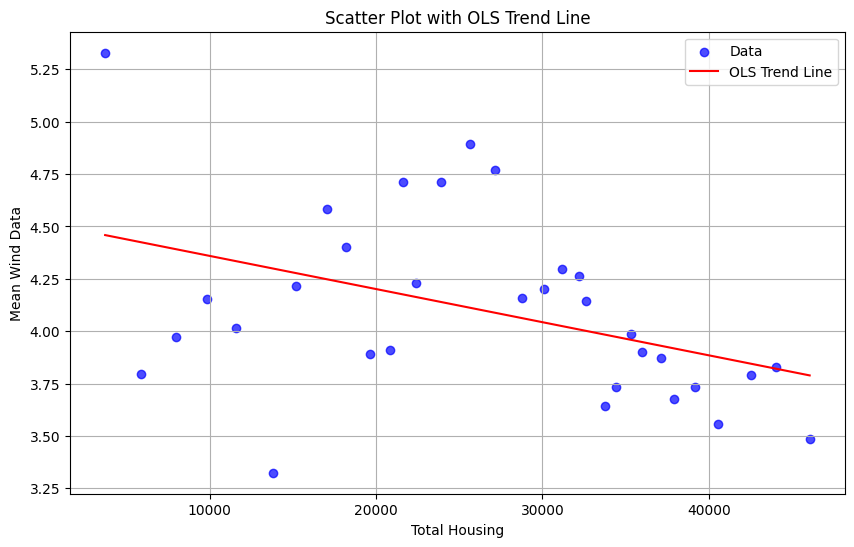

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
plt.plot(new_df['Total Housing'], model.predict(X), color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

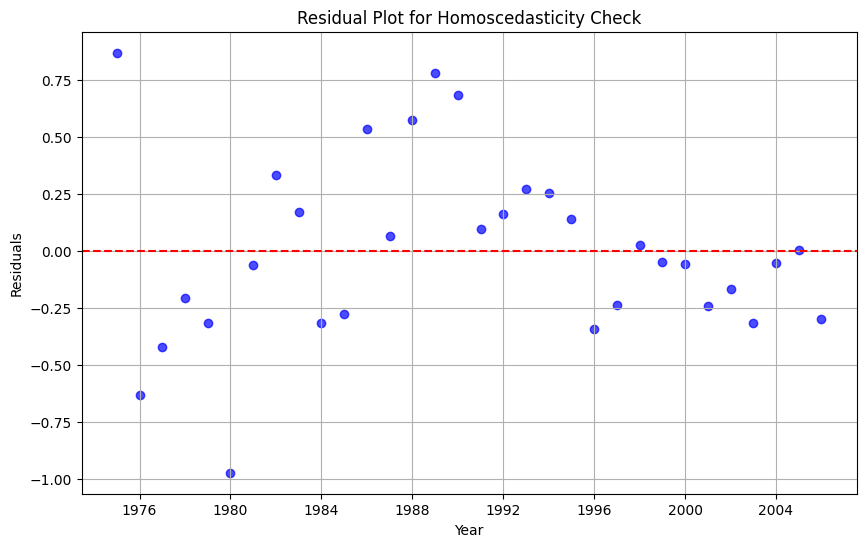

In [18]:
# Calculate the residuals
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df.index, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [19]:
# Calculate the Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

# Extract the test statistics and p-values
test_statistic = bp_test[0]
p_value = bp_test[1]

# Print the test results
print("Breusch-Pagan Test:")
print(f"Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Interpret the p-value to determine if heteroscedasticity is present
if p_value < 0.05:
    print("Heteroscedasticity is indicated (reject the null hypothesis).")
else:
        print("Heteroscedasticity is not indicated (fail to reject the null hypothesis).")

Breusch-Pagan Test:
Test Statistic: 7.266594880309459
P-Value: 0.007024885967354301
Heteroscedasticity is indicated (reject the null hypothesis).


# Trying the effect of Cumulative Building levels 

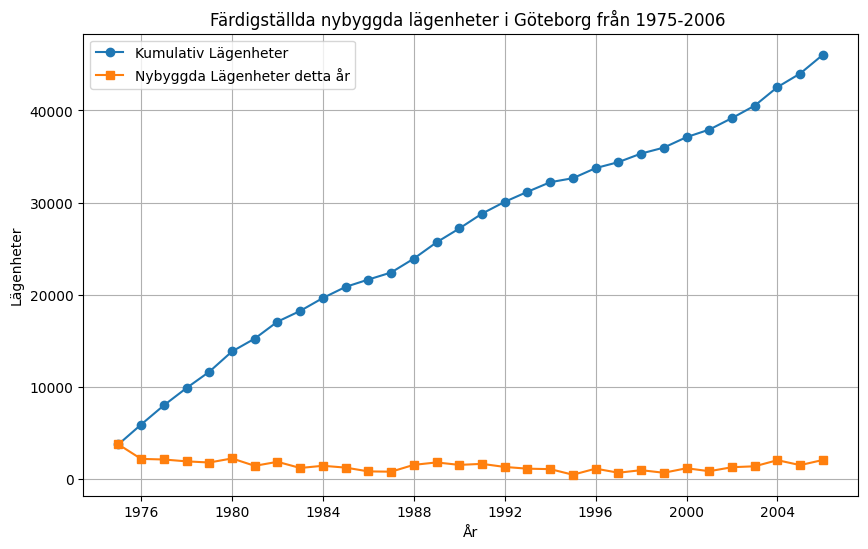

In [28]:
# scatterplot with wind data & total yearly new apartments 
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Total Housing'], label='Kumulativ Lägenheter', marker='o')
plt.plot(new_df.index, new_df['New Housing'], label='Nybyggda Lägenheter detta år', marker='s')
plt.title('Färdigställda nybyggda lägenheter i Göteborg från 1975-2006 ')
plt.xlabel('År')
plt.ylabel('Lägenheter')
plt.grid(True)
plt.legend()
plt.show()

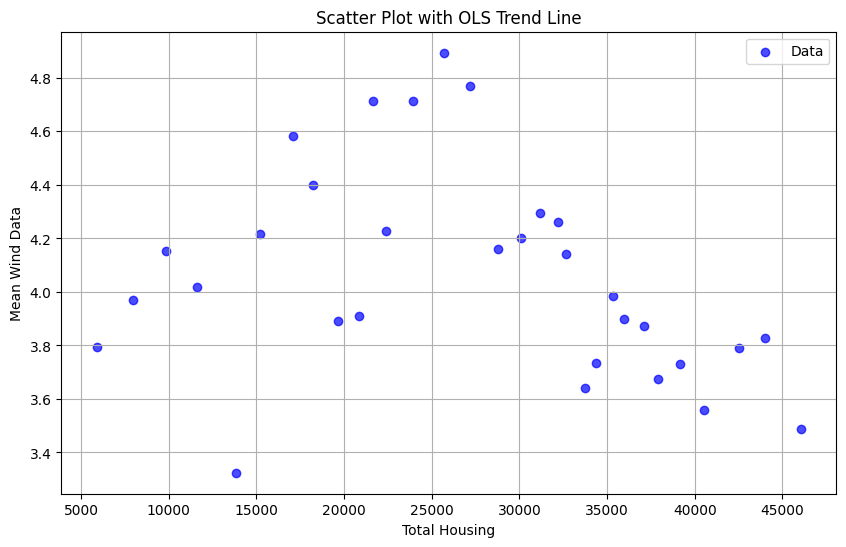

In [52]:
# Scatterplot, Housing levels vs Average yearly wind speed 
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
# plt.plot(new_df['Total Housing'], color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

1. Linearity -  the relationship appears linear. There is a possibility of a concave non linear relationship between 10000 and 30000. 
2. independence of errors? 
3. homoscedasticity
4. normality of errors -
6. autocorrelation 

# Removing outliers

given the large outliers in the data. They will be removed. 

In [51]:



# Remove outliers above 3000
new_df = new_df[new_df['Mean Wind Data'] <= 5.25]


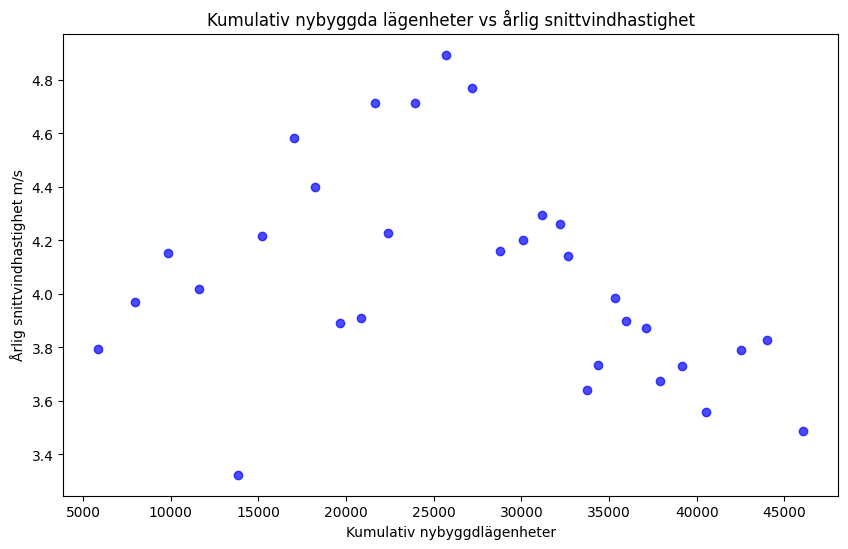

In [61]:
# Scatterplot without outliers, Housing levels vs Average yearly wind speed 
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
# plt.plot(new_df['Total Housing'], color='red', label='OLS Trend Line')
plt.title('Kumulativ nybyggda lägenheter vs årlig snittvindhastighet')
plt.xlabel('Kumulativ nybyggdlägenheter')
plt.ylabel('Årlig snittvindhastighet m/s')
plt.grid(False)

plt.show()

Calculate OLS, linear regression 

In [54]:

X = sm.add_constant(new_df['Total Housing'])

# Perform the linear regression
model = sm.OLS(new_df['Mean Wind Data'], X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Mean Wind Data   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.808
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.105
Time:                        10:50:41   Log-Likelihood:                -13.034
No. Observations:                  31   AIC:                             30.07
Df Residuals:                      29   BIC:                             32.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3422      0.182     23.846

# look at assumptions 

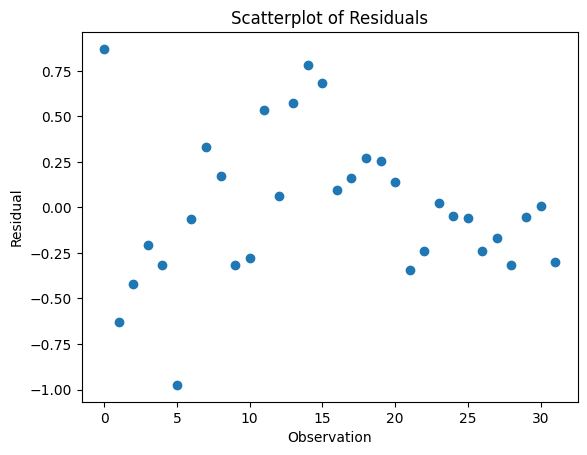

ValueError: could not broadcast input array from shape (32,) into shape (41,)

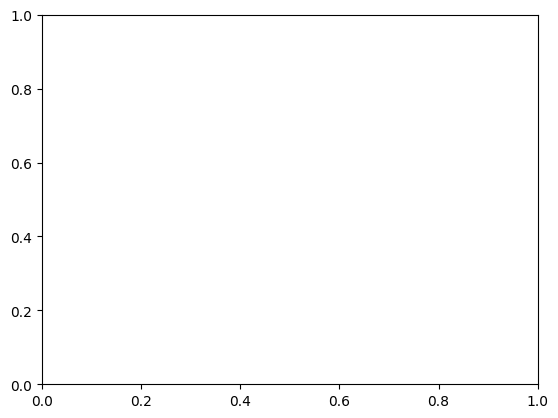

In [23]:
# Check for Independence of Errors
residuals = model.resid
# 1. Scatterplot of residuals


plt.scatter(range(len(residuals)), residuals)
plt.title("Scatterplot of Residuals")
plt.xlabel("Observation")
plt.ylabel("Residual")
plt.show()

# 2. Autocorrelation plot

plot_acf(residuals, lags=40)  # You can adjust the number of lags as needed
plt.title("Autocorrelation of Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

4. Normality of errors 

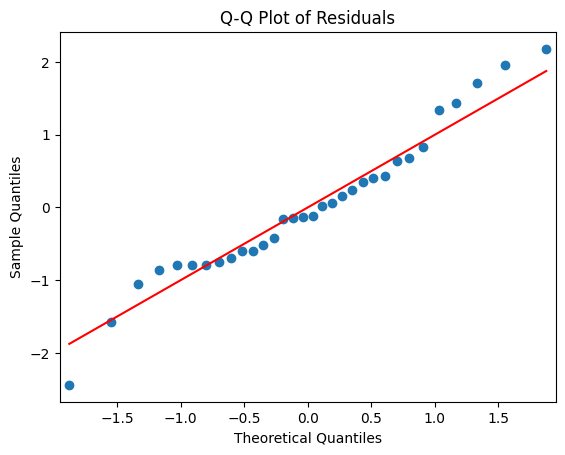

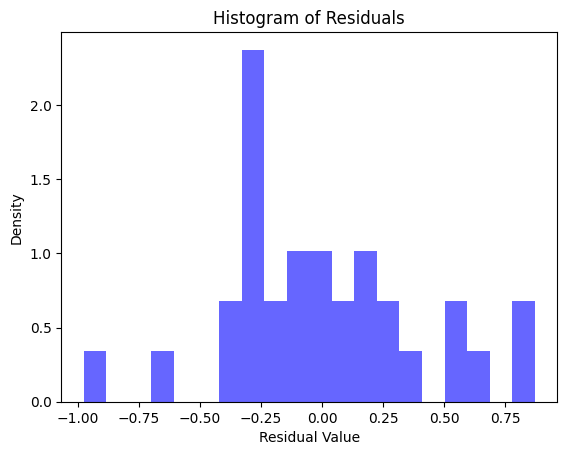

Shapiro-Wilk Test Statistic: 0.9699872136116028
p-value: 0.49904510378837585
The residuals appear to be normally distributed.


In [24]:

# 1. Q-Q plot
sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 2. Histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='b', label='Residuals')
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.show()

# 3. Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_stat}")
print(f"p-value: {shapiro_p_value}")

if shapiro_p_value < 0.05:
    print("The residuals are not normally distributed.")
else:
    print("The residuals appear to be normally distributed.")

While the distribution shows a bit of bumpiness, and the tails have a bit high kurotisis, we can still say it is sort of normal. 

7. No autocorrelation 

ValueError: could not broadcast input array from shape (32,) into shape (41,)

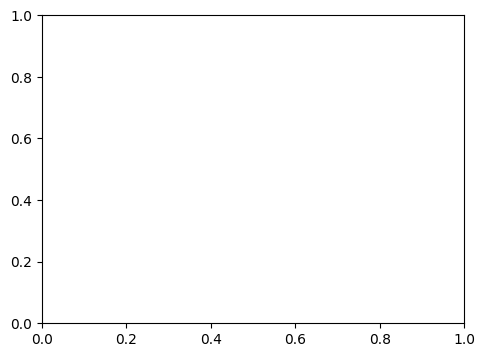

In [25]:
# 1. Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title("Autocorrelation of Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

# 2. Durbin-Watson Test
durbin_watson_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {durbin_watson_statistic}")

# Interpretation of Durbin-Watson Statistic
if durbin_watson_statistic > 1.5 and durbin_watson_statistic < 2.5:
    print("The residuals show no significant autocorrelation.")
else:
    print("The residuals may exhibit autocorrelation. Further investigation is needed.")

given the autocorrelation in the data, the implementation of a time series model would be necessary. 

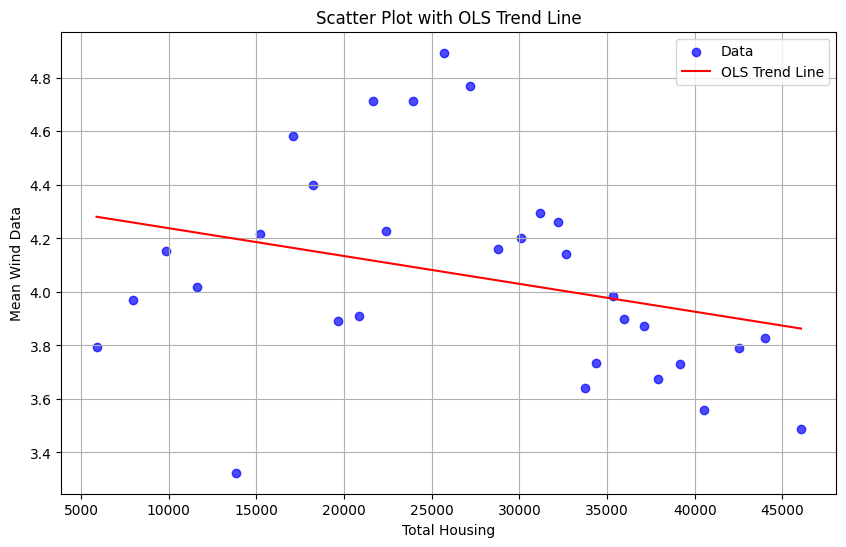

In [55]:
# plotting the regression line ontop of the data 

plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
plt.plot(new_df['Total Housing'], model.predict(X), color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

after we increase the amount of housing by 1 unit, the wind hastighet decreases by around 0.00002832 ° C 

If housing increases by the mean of 1842 a year, windspeed will reduce by around 0.05 X per hour. 

on average, housing increased by 1842.625000 a year. That means that in this indication, the 

overall. From year 1975 to 2022, housing increased by 88446 units. that would mean a reduction in average yearly wind speeds of 2.504 X per hour. 

Creating a convex hyperbolic relationship instead 

In [56]:
new_df['X_squared'] = new_df['Total Housing'] ** 2

/var/folders/_j/5m27v9d97s52n36q1cv3wj2c0000gp/T/ipykernel_2468/3601667867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['X_squared'] = new_df['Total Housing'] ** 2


In [57]:
X = sm.add_constant(np.column_stack((new_df['Total Housing'], new_df['X_squared'])))

model = sm.OLS(new_df['Mean Wind Data'], X).fit()

                            OLS Regression Results                            
Dep. Variable:         Mean Wind Data   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     9.670
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           0.000641
Time:                        11:15:28   Log-Likelihood:                -6.3261
No. Observations:                  31   AIC:                             18.65
Df Residuals:                      28   BIC:                             22.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3318      0.299     11.130      0.0

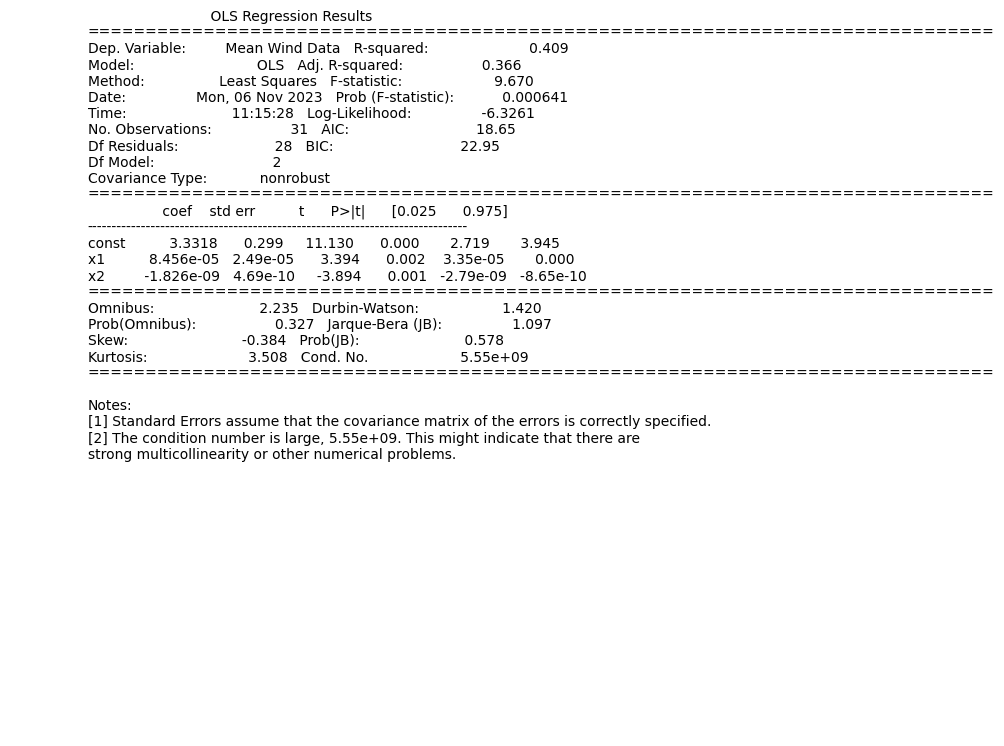

In [63]:
print(model.summary())
summary = model.summary()
# Save the summary as a PNG image
with open("regression_summary.txt", "w") as f:
    f.write(summary.as_text())
plt.figure(figsize=(10, 6))
plt.text(0.1, 0.6, summary.as_text(), fontsize=10)
plt.axis('off')
plt.savefig("regression_summary.png")

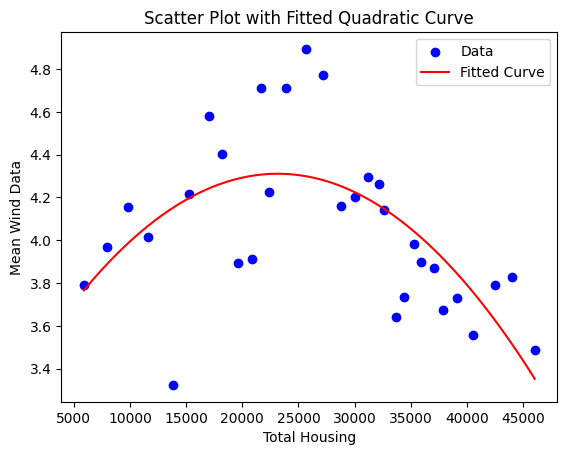

In [59]:
# Scatter plot the data points
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], label='Data', color='blue')

# Generate values for X to plot the fitted curve
X_plot = np.linspace(new_df['Total Housing'].min(), new_df['Total Housing'].max(), 100)
X_plot_squared = X_plot ** 2
X_plot = sm.add_constant(np.column_stack((X_plot, X_plot_squared)))

# Predict the values for Y using the fitted model
Y_plot = model.predict(X_plot)

# Plot the fitted quadratic curve
plt.plot(X_plot[:, 1], Y_plot, label='Fitted Curve', color='red')

plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.legend()
plt.title('Scatter Plot with Fitted Quadratic Curve')
plt.show()



